<a href="https://colab.research.google.com/github/OkeyNich/OkeyNich/blob/main/Copy_of_Okey_Simple_liniear_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')

In [ ]:
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area', 
                'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
                'X6': 'Orientation', 'X7': 'Glazing_Area', 
                'X8': 'Glazing_Area_Distribution', 
                'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

In [ ]:
df = df.rename(columns=column_names)

In [ ]:
#select a sample of the dataset
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)

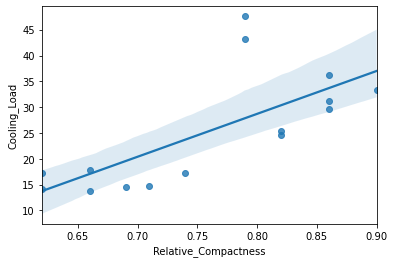

In [ ]:
#regression plot
import seaborn as sns
sns.regplot(x="Relative_Compactness", y="Cooling_Load",data=simple_linear_reg_df)

The conculusion is that there is no relationship between the cooling_load and Relative_Compactness. There we can say there is no corolation beetwen the two.

In [ ]:
simple_linear_reg_df.value_counts()

Relative_Compactness  Cooling_Load
0.90                  33.31           1
0.86                  36.21           1
                      31.28           1
                      29.69           1
0.82                  25.35           1
                      24.61           1
0.79                  47.59           1
                      43.14           1
0.74                  17.25           1
0.71                  14.67           1
0.69                  14.60           1
0.66                  17.79           1
                      13.83           1
0.62                  17.21           1
                      14.24           1
dtype: int64

### The data above further clarify the fact that there is no colrolation between Relative_Compactness and Cooling_Load.

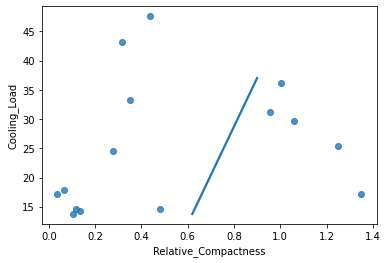

In [ ]:

sns.regplot(x="Relative_Compactness", y="Cooling_Load",data=simple_linear_reg_df,ci=None,x_jitter=0.75)

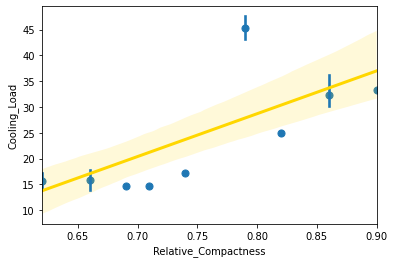

In [ ]:
import numpy as np
sns.regplot(x="Relative_Compactness", y="Cooling_Load",data=simple_linear_reg_df,x_estimator=np.mean,line_kws={'lw':3,'color':'gold'})